### This notebook track and analyze the COVID-19 vaccination progress
# Content
### <a href = '#1'>1. Data overview</a>
>#### <a href = '#1.1'>1.1. Vaccinations data overview</a>
>#### <a href = '#1.2'>1.2. Covid cases data overview</a>
### <a href = '#2'>2. Track vaccination progress by country</a>
>#### <a href = '#2.1'>2.1. Total vaccinations by country</a>
>#### <a href = '#2.2'>2.2. Daily vaccination progress for Top 10 country </a>
>#### <a href = '#2.3'>2.3. Vaccine vs COVID</a>
### <a href = '#3'>3. Track vaccinations progress by vaccine</a>
>#### <a href = '#3.1'>3.1. Number of countries for each vaccine</a>
>#### <a href = '#3.2'>3.2. Total vaccination for each vaccines combo</a>
>#### <a href = '#3.3'>3.3. Daily vaccinations for top 10 vaccines combo</a>

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sys, os, collections

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# <a id = '1'>1. Data overview</a>
## <a id = '1.1'>1.1. Vaccinations data overview</a>

In [2]:
dataVaccine = pd.read_csv('data/country_vaccinations.csv')
print('data size:', dataVaccine.shape)
dataVaccine.sample(5)

data size: (4678, 15)


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1226,Denmark,DNK,2021-02-13,398253.0,230495.0,167758.0,7531.0,9440.0,6.88,3.98,2.90,1630.0,"Moderna, Pfizer/BioNTech",Statens Serum Institut,https://covid19.ssi.dk/overvagningsdata/vaccin...
2039,Indonesia,IDN,2021-02-01,574938.0,539532.0,35406.0,59257.0,58997.0,0.21,0.20,0.01,216.0,Sinovac,Ministry of Health,https://www.kemkes.go.id/
121,Argentina,ARG,2021-01-08,107542.0,NaN,NaN,NaN,10519.0,0.24,NaN,NaN,233.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
341,Bangladesh,BGD,2021-02-06,NaN,NaN,NaN,NaN,3059.0,NaN,NaN,NaN,19.0,Oxford/AstraZeneca,Directorate General of Health Services,https://corona.gov.bd/storage/press-releases/F...
3586,Romania,ROU,2021-02-12,1046451.0,680366.0,366085.0,39375.0,32177.0,5.44,3.54,1.90,1673.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of Romania,https://datelazi.ro/


In [3]:
## clean 'country' column
dropCs = {'England', 'Northern Ireland', 'Scotland', 'Wales'}
dataVaccine = dataVaccine[~dataVaccine['country'].isin(dropCs)]
dataVaccine['country'] = dataVaccine['country'].replace({'Northern Cyprus': 'Cyprus'})
cs = set(dataVaccine['country'])

## <a id = '1.2'>1.2. Covid cases data overview</a>

In [4]:
dataCase = pd.read_csv('data/COVID-19 - Johns Hopkins University.csv')
print('data size:', dataCase.shape)
dataCase.sample(5)

data size: (74768, 53)


,Country,Year,Daily new confirmed cases of COVID-19,Daily new confirmed deaths due to COVID-19,Total confirmed cases of COVID-19,Total confirmed deaths due to COVID-19,Daily new confirmed cases of COVID-19 per million people,Daily new confirmed deaths due to COVID-19 per million people,Total confirmed cases of COVID-19 per million people,Total confirmed deaths due to COVID-19 per million people,Days since the total confirmed cases of COVID-19 reached 100,Days since the total confirmed deaths of COVID-19 reached 5,Days since the total confirmed cases of COVID-19 per million people reached 1,Days since the total confirmed deaths of COVID-19 per million people reached 0.1,Days since 30 daily new confirmed cases recorded,Days since 50 daily new confirmed cases recorded,Days since 10 daily new confirmed deaths recorded,Days since 5 daily new confirmed deaths recorded,Days since 3 daily new confirmed deaths recorded,"Days since daily new confirmed cases of COVID-19 (rolling 7-day average, right-aligned) reached 30","Days since daily new confirmed deaths due to COVID-19 (rolling 7-day average, right-aligned) reached 5","Days since daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned) reached 1","Days since daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned) reached 0.1","Days since daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned) reached 0.01","Daily new confirmed cases of COVID-19 (rolling 3-day average, right-aligned)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)","Daily new confirmed deaths due to COVID-19 (rolling 3-day average, right-aligned)","Daily new confirmed deaths due to COVID-19 (rolling 7-day average, right-aligned)","Daily new confirmed cases of COVID-19 per million people (rolling 3-day average, right-aligned)","Daily new confirmed deaths due to COVID-19 per million people (rolling 3-day average, right-aligned)","Daily new confirmed cases of COVID-19 per million people (rolling 7-day average, right-aligned)","Daily new confirmed deaths due to COVID-19 per million people (rolling 7-day average, right-aligned)",Case fatality rate of COVID-19 (%),Case fatality rate of COVID-19 (%) (Only observations with ≥100 cases),Case fatality rate of COVID-19 (%) (Short-term),Days since the total confirmed cases of COVID-19 reached 100 (with population ≥ 5M),Has population ≥ 5M AND had ≥100 cases ≥21 days ago AND has testing data,Doubling days of total confirmed cases (3 day period),Doubling days of total confirmed cases (7 day period),Doubling days of total confirmed deaths (3 day period),Doubling days of total confirmed deaths (7 day period),Weekly cases,Weekly deaths,Weekly case growth (%),Weekly death growth (%),Biweekly cases,Biweekly deaths,Biweekly case growth (%),Biweekly death growth (%),Weekly cases per million people,Weekly deaths per million people,Biweekly cases per million people,Biweekly deaths per million people
4774,Austria,296,9262.0,44.0,181642.0,1608.0,1028.380,4.885,20168.103,178.540,249.0,238.0,256.0,245.0,247.0,247.0,231.0,235.0,235.0,246.0,231.0,250.0,236.0,243.0,7632.00000,7018.14286,51.33333,48.57143,847.39767,5.69933,779.23971,5.39271,0.885,0.885,1.351,249.0,1,15.43,15.39,20.66,20.43,49127.0,340.0,27.384224,60.377358,87693.0,552.0,160.023721,208.379888,5454.677,37.751,9736.743,61.29
51113,Palestine,381,472.0,2.0,161559.0,1867.0,92.523,0.392,31669.442,365.977,313.0,221.0,336.0,316.0,308.0,231.0,145.0,209.0,220.0,230.0,145.0,335.0,220.0,314.0,534.33333,484.42857,6.00000,6.28571,104.74200,1.17600,94.95957,1.23200,1.156,1.156,1.280,313.0,1,208.54,228.73,214.64,203.44,3391.0,44.0,-6.092495,-18.518519,7002.0,98.0,-17.458446,-53.333333,664.717,8.625,1372.560,19.21
12900,Central African Republic,66,0.0,NaN,3.0,NaN,0.000,NaN,0.621,NaN,-42.0,-71.0,-7.0,-57.0,-32.0,-49.0,NaN,-81.0,-81.0,-53.0,NaN,-32.0,-71.0,-59.0,0.00000,0.00000,NaN,NaN,0.0

In [5]:
# clean 'Country' column and rename some columns
dataCase = dataCase[dataCase['Country'].isin(cs)].rename(columns = {
    'Country': 'country', 'Total confirmed cases of COVID-19': 'total_cases',
    'Total confirmed deaths due to COVID-19': 'total_deaths',
    'Total confirmed cases of COVID-19 per million people': 'total_cases_permillion',
    'Total confirmed deaths due to COVID-19 per million people': 'total_deaths_permillion',
    'Daily new confirmed cases of COVID-19': 'daily_cases',
    'Daily new confirmed deaths due to COVID-19': 'daily_deaths'})

# <a id = '2'>2. Track vaccination progress by country</a>
## <a id = '2.1'>2.1. Total vaccinations by country</a>

In [6]:
dataVaccine['date'] = [pd.Timestamp(x) for x in dataVaccine['date']]
dataVaccine = dataVaccine.sort_values(by = 'date')
## group data by country to show lastest vaccination status
vaccineByCountry = dataVaccine[[
    'country', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
    'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred']].groupby('country').agg('max').reset_index()

dataCase['date'] = [pd.to_datetime(str(2020 + x // 366) + str(x % 366 + 1), format='%Y%j') for x in dataCase['Year']]
dataCase = dataCase.sort_values(by = 'date')
## group data by country to show lastest covid statistics
caseByCountry = dataCase[['country', 'total_cases', 'total_deaths',
                          'total_cases_permillion', 'total_deaths_permillion'
                         ]].groupby(by = 'country').agg(max).reset_index()

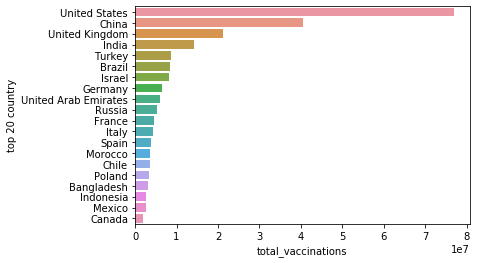

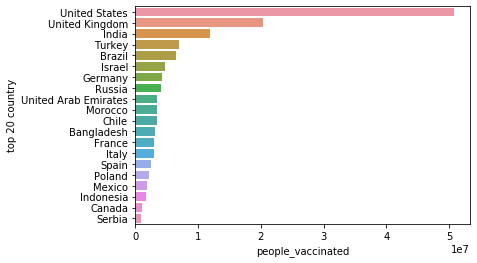

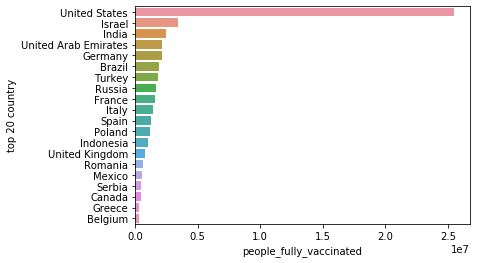

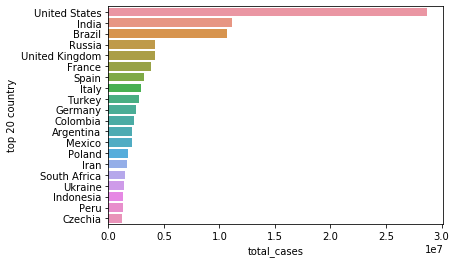

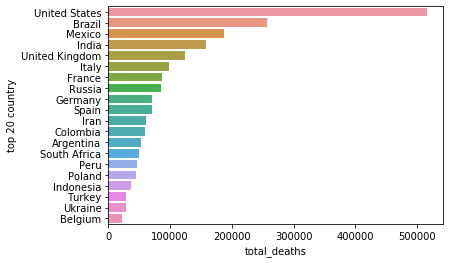

In [7]:
# define function to get total vaccination rankings
def getTotalVaccine(col, data):
    col_percent = col + '_percent'
    total = sum(data[col].dropna())
    data[col_percent] = round(data[col] / total, 4)
    return data[['country', col, col_percent]].sort_values(by = col, ascending = False).reset_index(drop = True)

# define function to plot top 20 countries data
def plotTop20(col, data):
    plt.figure()
    data1 = getTotalVaccine(col, data).iloc[: 20].rename(columns = {'country': 'top 20 country'})
    ax = sb.barplot(y = 'top 20 country', x = col, data = data1, orient = 'h')
    return [x for x in data1['top 20 country']]

## show ranking of countries based on 'total_vaccinations'
cs1 = plotTop20('total_vaccinations', vaccineByCountry)

## show ranking of countries based on 'people_vaccinated'
cs2 = plotTop20('people_vaccinated', vaccineByCountry)

## show ranking of countries based on 'people_fully_vaccinated'
cs3 = plotTop20('people_fully_vaccinated', vaccineByCountry)

## show countries with most covid cases
cs4 = plotTop20('total_cases', caseByCountry)

## show countries with most covid deaths
cs5 = plotTop20('total_deaths', caseByCountry)

### Thoughts:
* Countries that get most vaccinations are countries with most COVID cases: out of the 20 countries with most vaccinations, 13 of them are top 20 in COVID cases, and 14 of them are top 20 in COVID deaths.

## <a id = '2.2'>2.2. Daily vaccination progress for top 10 country</a>

C:\Users\zousuoyu\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\zousuoyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


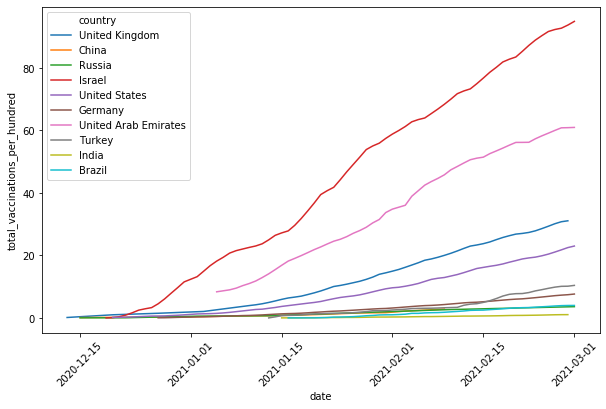

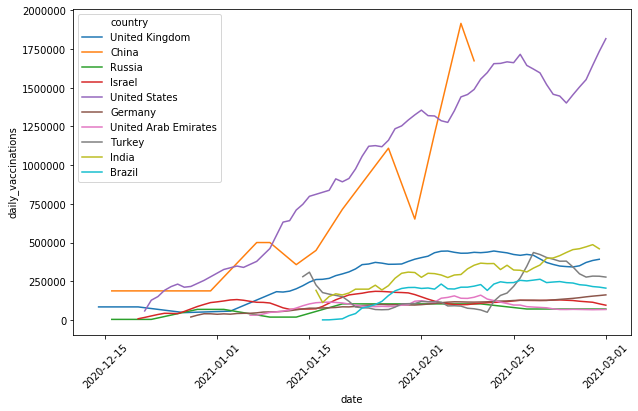

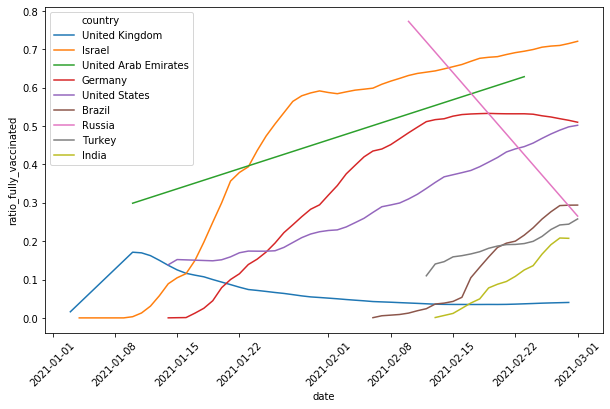

In [8]:
# define function to plot certain vaccinations metric progress for top10 country
def plotDaily(col, data):
    plt.figure(figsize = (10, 6))
    ax = sb.lineplot(x = 'date', y = col, data = data[['date', 'country', col]].dropna(), hue = 'country')
    for xticker in ax.get_xticklabels():
        xticker.set_rotation(45)

dataVaccineTop10 = dataVaccine[dataVaccine['country'].isin(cs1[: 10])]
## plot 'total_vaccinations_per_hundred' for top 10 countries over time
plotDaily('total_vaccinations_per_hundred', dataVaccineTop10)

## plot 'daily_vaccinations' for top 10 countries
plotDaily('daily_vaccinations', dataVaccineTop10)

## get ratio between 'people_vaccinated' and 'people_fully_vaccinated'
dataVaccineTop10['ratio_fully_vaccinated'] = dataVaccineTop10[
    'people_fully_vaccinated'] / dataVaccineTop10['people_vaccinated']
## plot 'ratio_fully_vaccinated' for top 5 countries
plotDaily('ratio_fully_vaccinated', dataVaccineTop10)

### Thoughts:
* The daily vaccinations are quickly ramping up in countries like USA and China, which are the main producer of vaccines.
* The vaccination process has been stable and gradually improving in countries like German and India.
* Some good vaccinations progress has been seen in UK, Israel and UAE, which are already high in vaccinations per hunderd, and therefore are now seeing a drop in daily vaccinations.
* However, vaccinations are not stable in some countries such as Turkey and Russia, which may be caused by shortage of supplies in the market.
* Notice that there are rapid drops in full vaccination ratios in UK and russia. This may also caused by shortage of supplies as well as some policies that emphasize more on encourage people to get their fist vaccine shot.

## <a id = '2.3'>2.3. Vaccine vs COVID</a>

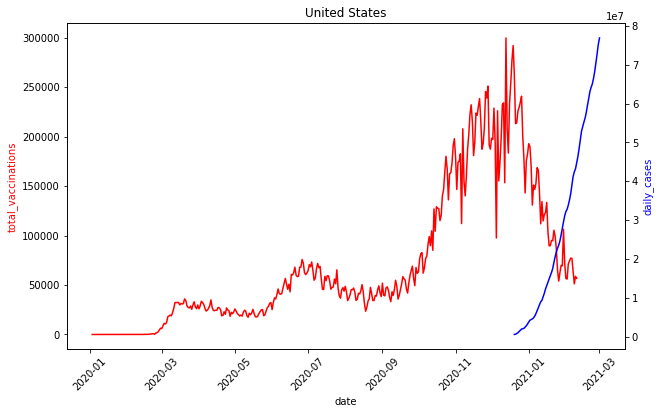

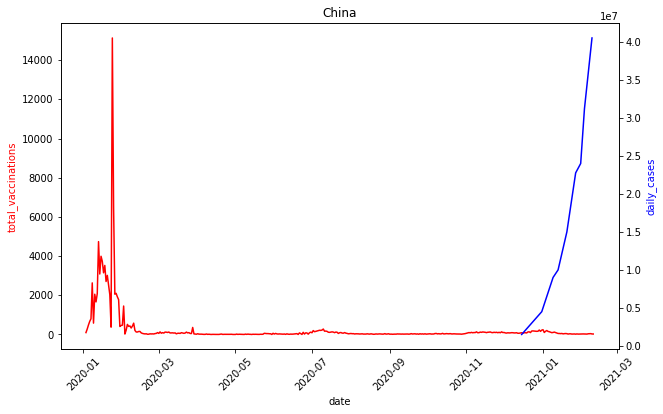

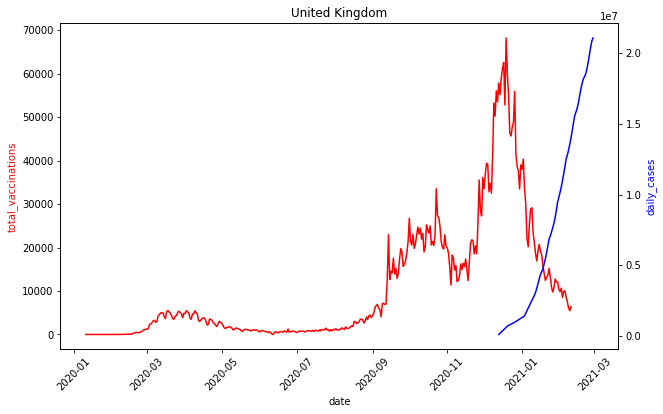

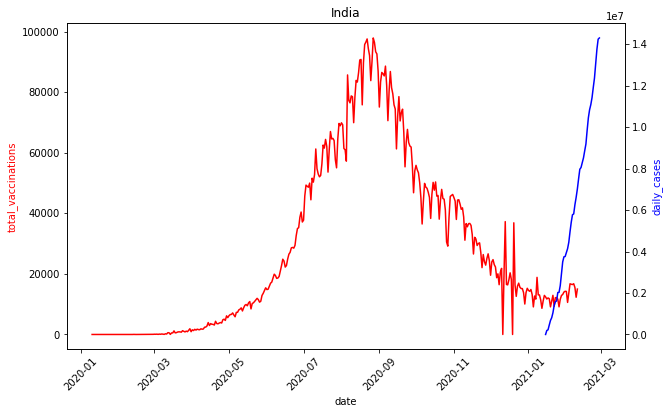

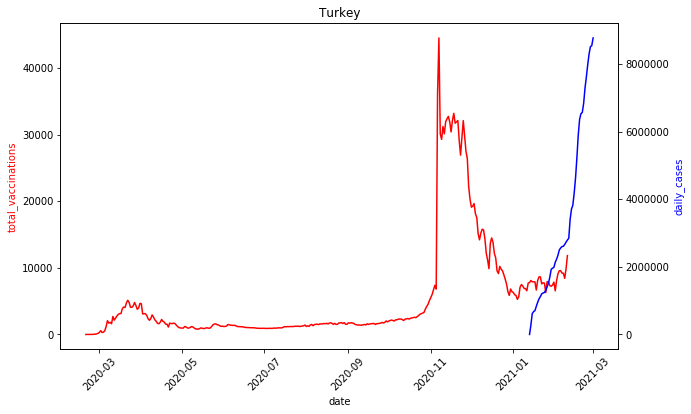

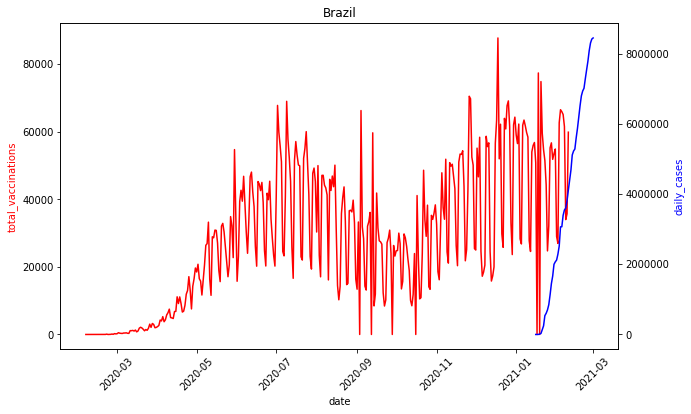

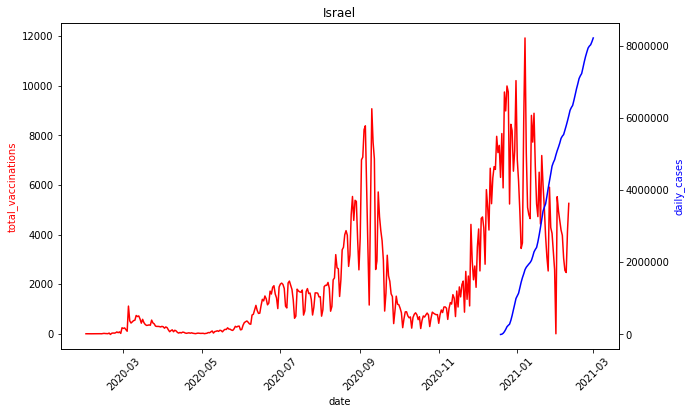

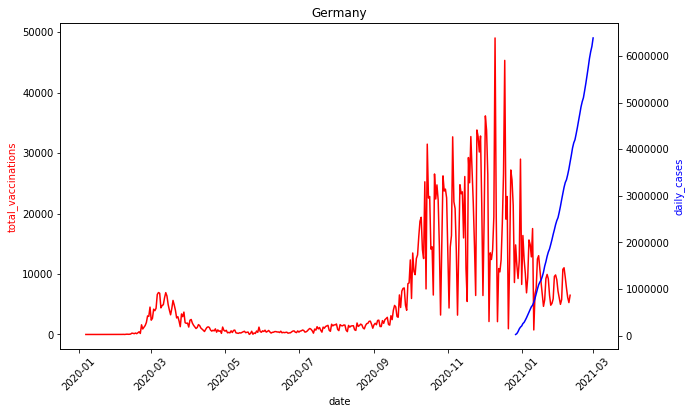

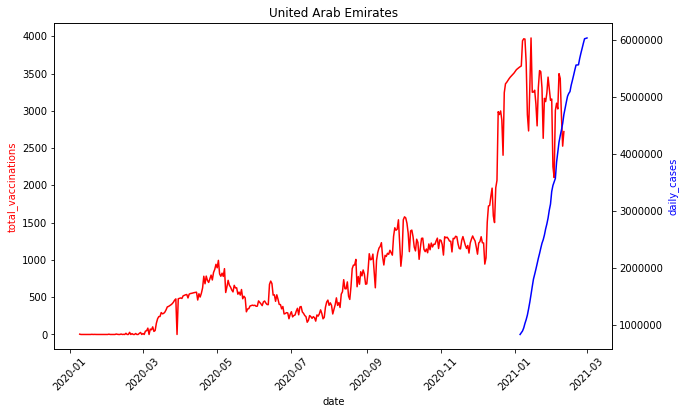

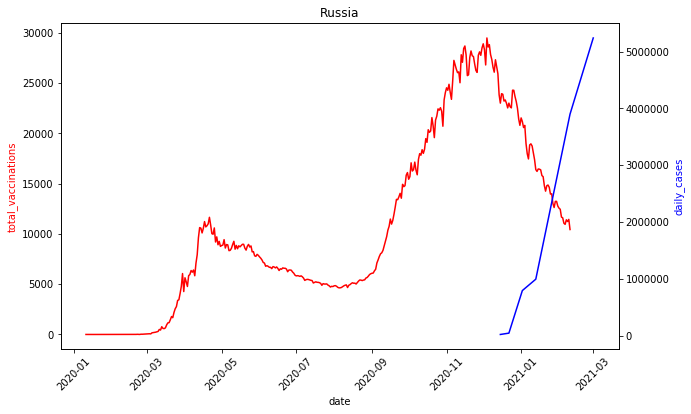

In [9]:
# define function to plot vaccinations vs daily cases vs daily deaths
def plotDaily(country, col1, data1, col2, data2):
    data1 = data1[data1['country'] == country][['date', col1]].dropna()
    data2 = data2[data2['country'] == country][['date', col2]].dropna()
    fig, ax1 = plt.subplots(figsize = (10, 6))
    ax2 = ax1.twinx()
    ax1.plot(data2['date'], data2[col2], color = 'red')
    ax2.plot(data1['date'], data1[col1], color = 'blue')
    for xticker in ax1.get_xticklabels():
        xticker.set_rotation(45)
    ax1.set_title(country)
    ax1.set_xlabel('date')
    ax1.set_ylabel(col1, color = 'red')
    ax2.set_ylabel(col2, color = 'blue')
    plt.show()

## plot 'total_vaccination' vs 'daily_cases' for top 10 countries
for c in cs1[: 10]:
    plotDaily(c, 'total_vaccinations', dataVaccine, 'daily_cases', dataCase)

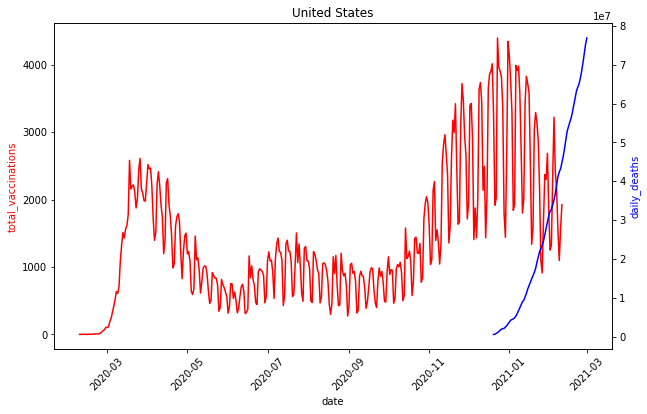

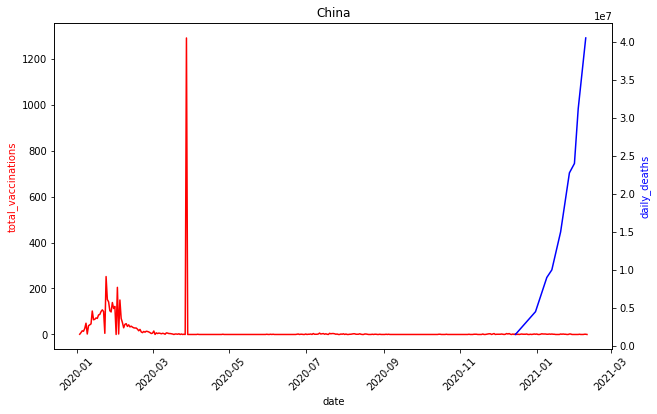

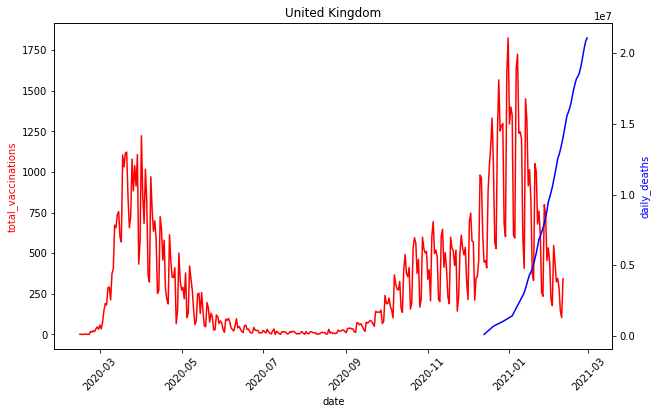

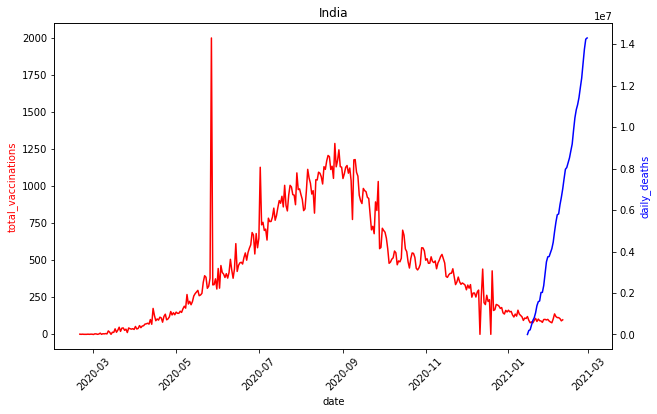

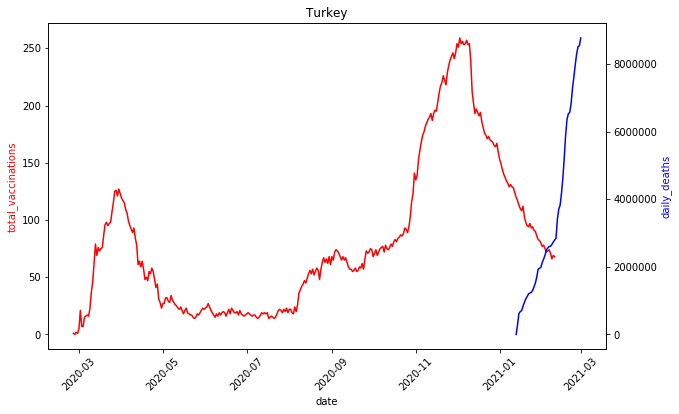

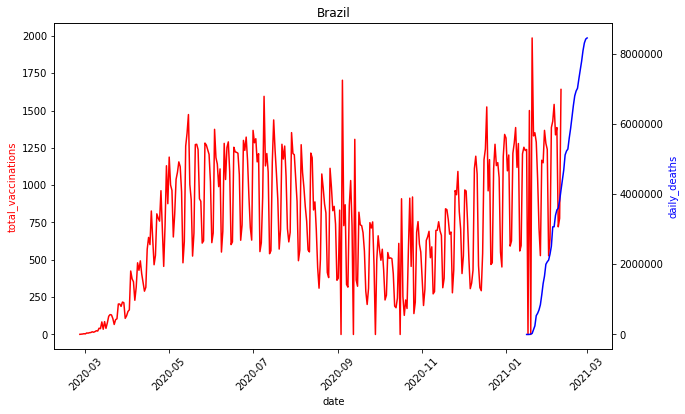

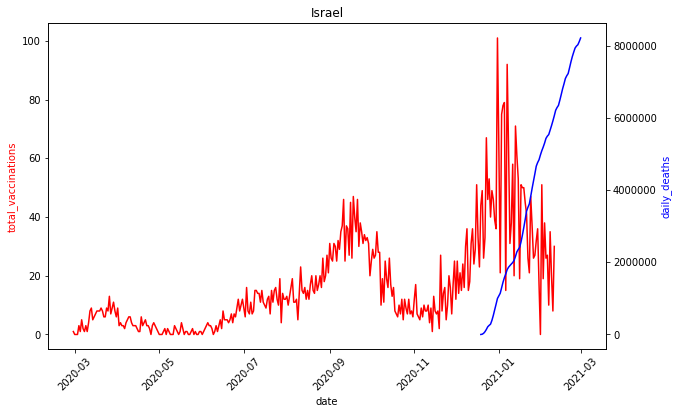

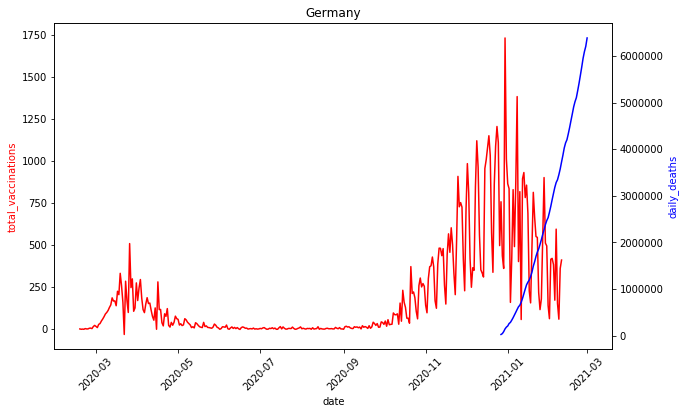

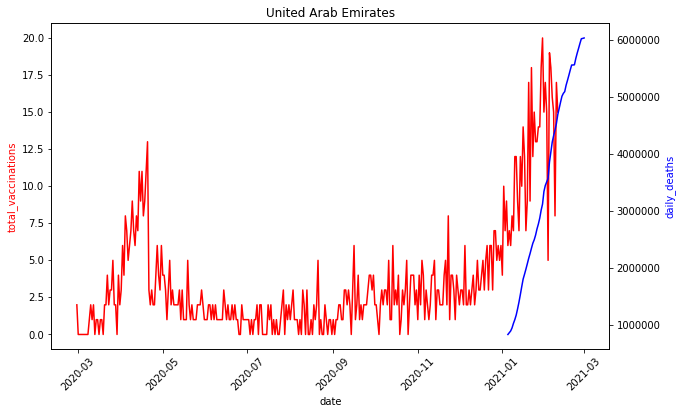

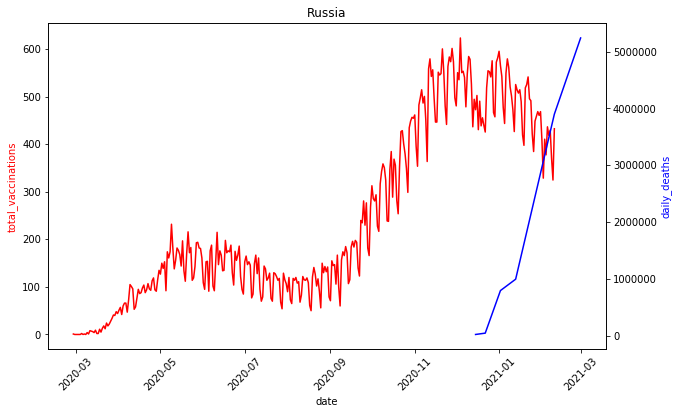

In [10]:
## plot 'total_vaccination' vs 'daily_deaths' for top 10 countries
for c in cs1[: 10]:
    plotDaily(c, 'total_vaccinations', dataVaccine, 'daily_deaths', dataCase)

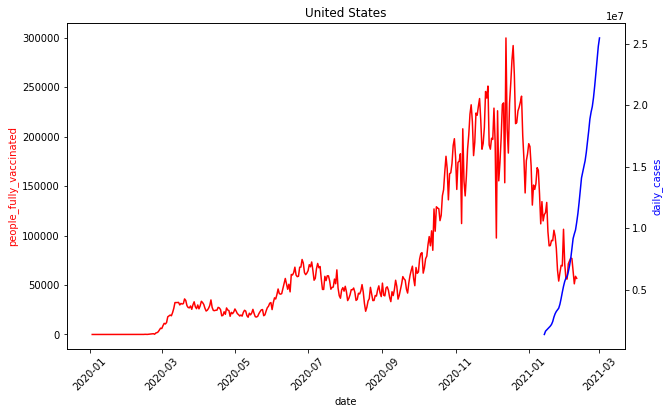

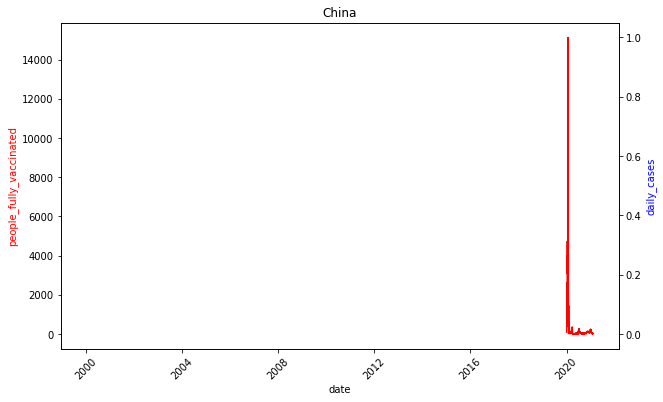

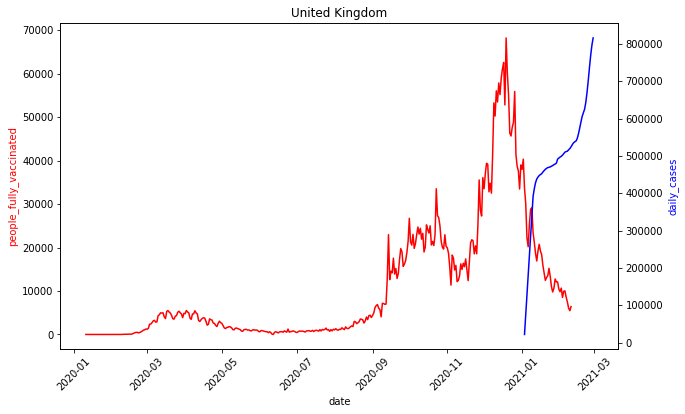

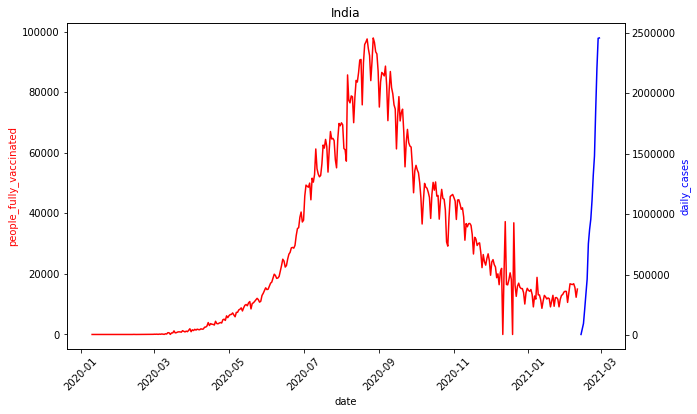

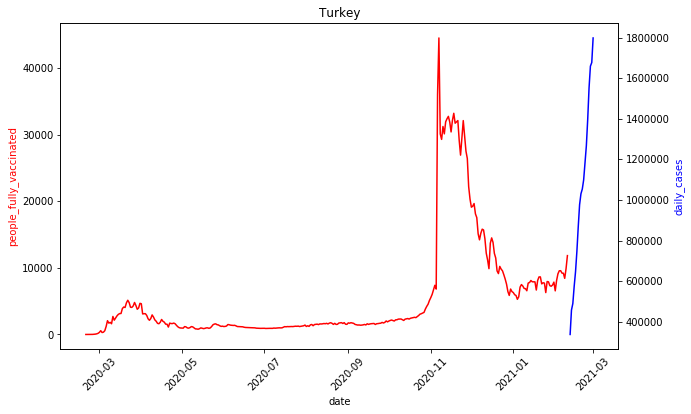

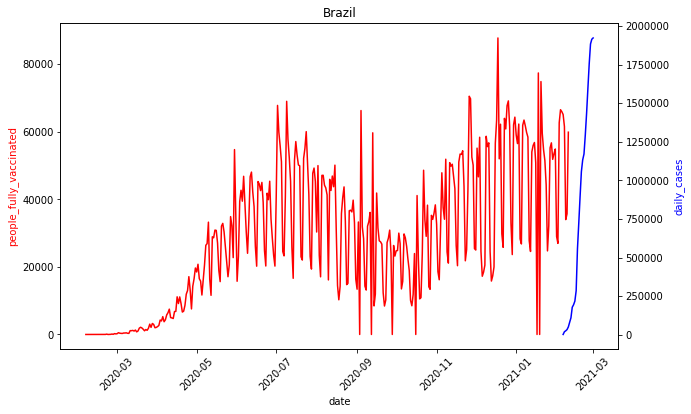

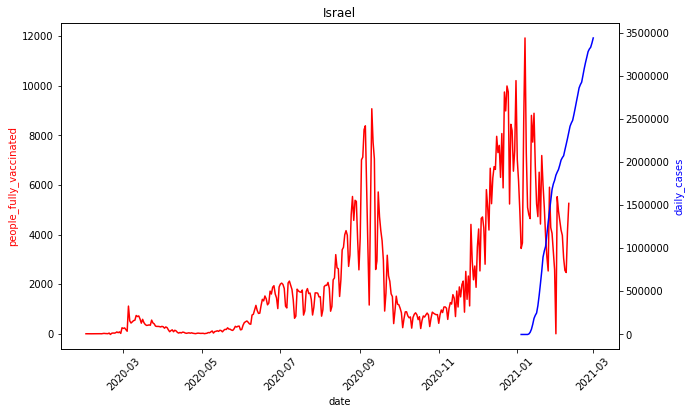

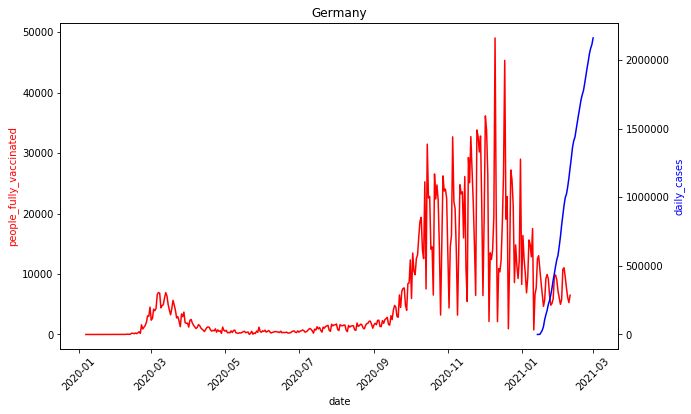

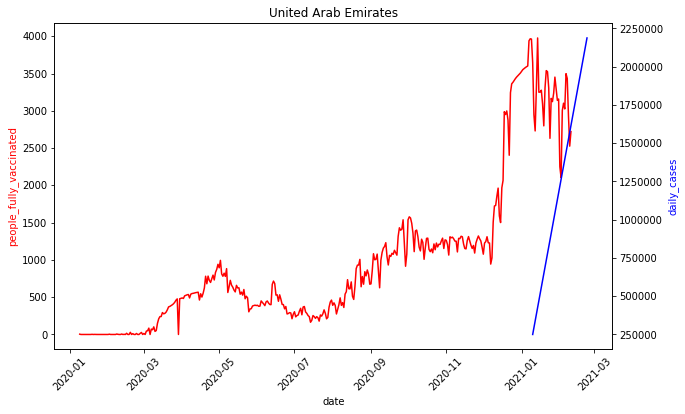

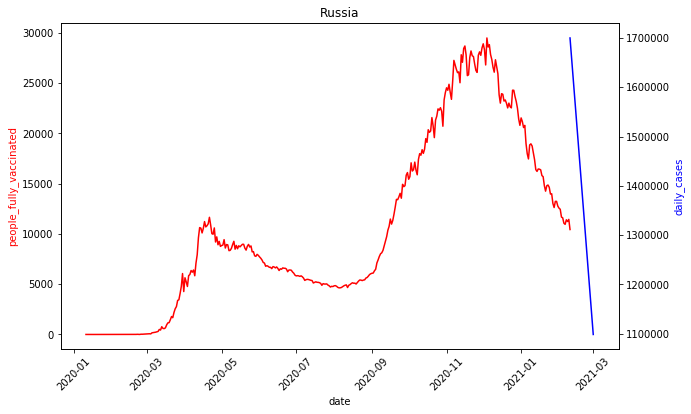

In [11]:
## plot 'people_fully_vaccinated' vs 'daily_cases' for top 10 countries
for c in cs1[: 10]:
    plotDaily(c, 'people_fully_vaccinated', dataVaccine, 'daily_cases', dataCase)

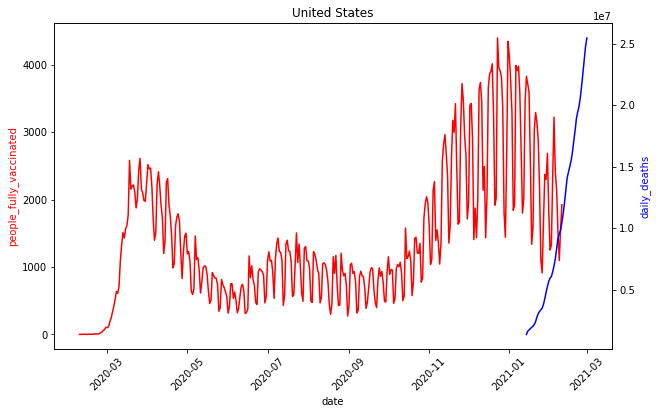

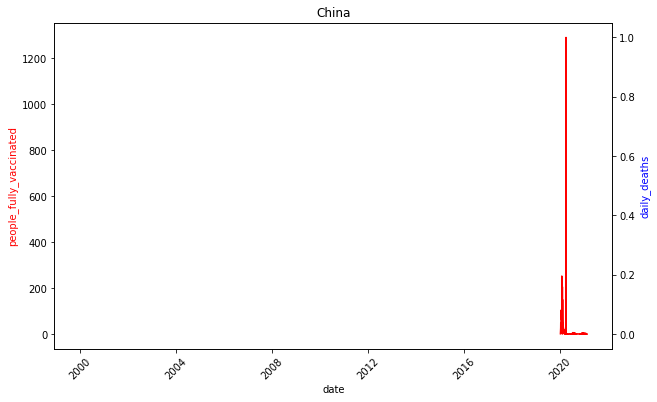

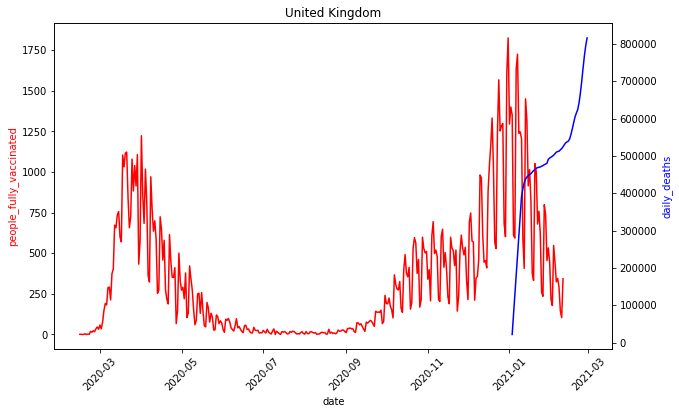

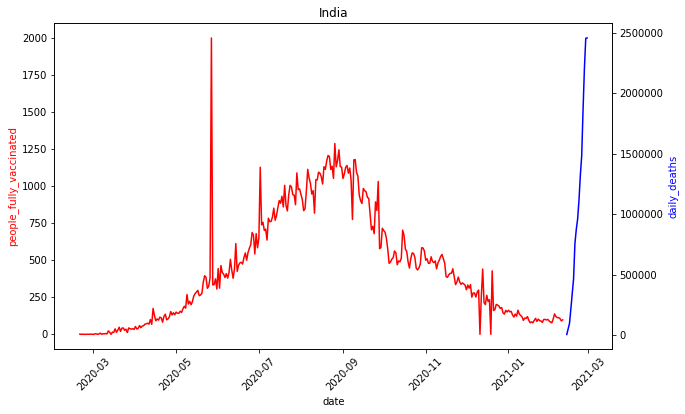

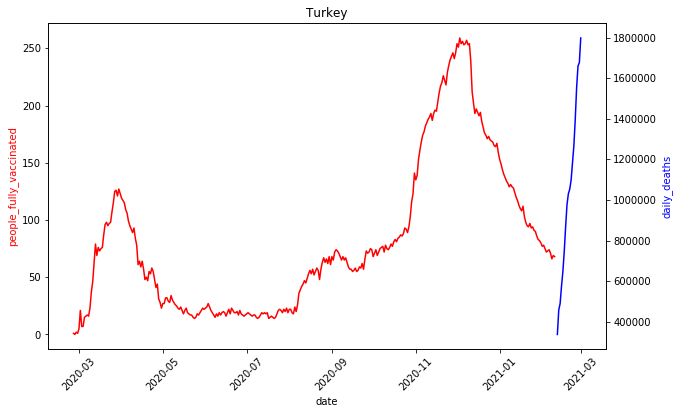

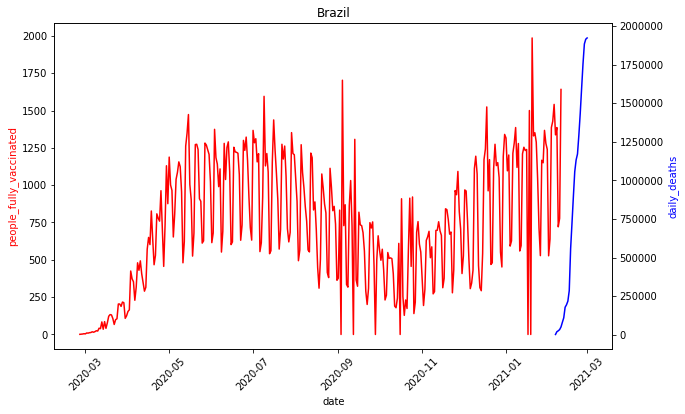

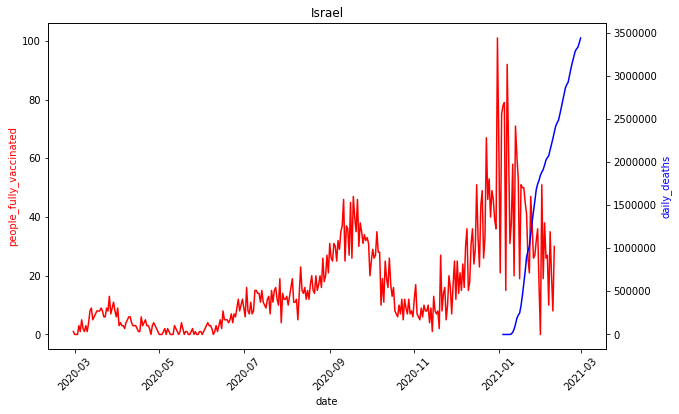

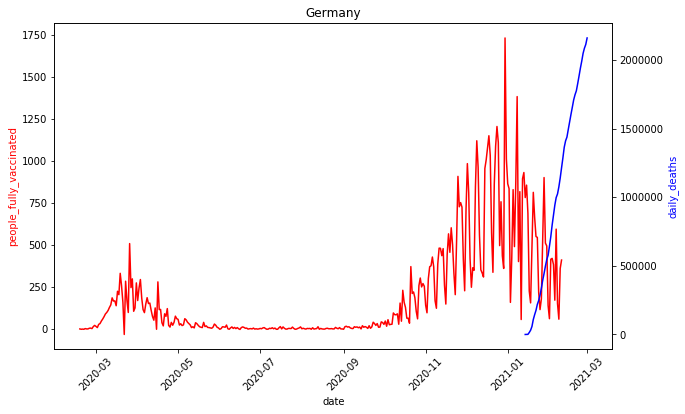

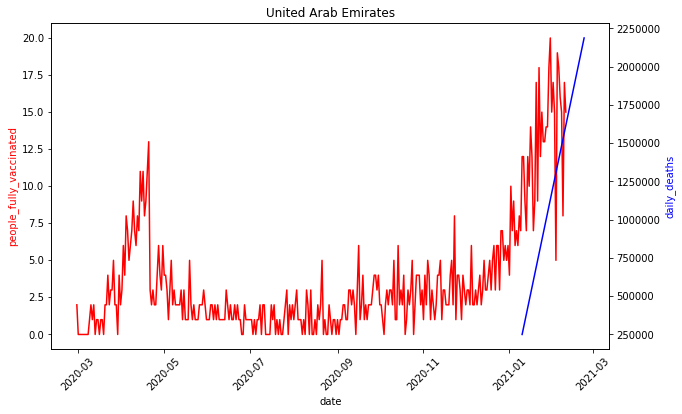

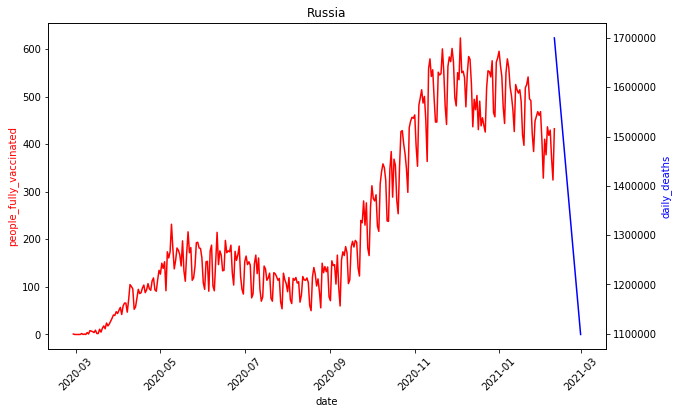

In [12]:
## plot 'people_fully_vaccinated' vs 'daily_deaths' for top 10 countries
for c in cs1[: 10]:
    plotDaily(c, 'people_fully_vaccinated', dataVaccine, 'daily_deaths', dataCase)

### Thoughts:
* In US, UK, German, Russia, UAE and Israel, it appears that after vaccinations, their daily cases/deaths have stopped rising and started to drop.
* In India, Brazil and Turkey, their daily/deaths cases seems unaffected by vaccinations.
* In general, it is still too early to tell the effect of vaccinations on fighting COVID-19.

# <a id = '3'>3. Track vaccinations progress by vaccine</a>
## <a id = '3.1'>3.1. Number of countries for each vaccine</a>

In [13]:
dataVaccine = dataVaccine[dataVaccine['vaccines'].notna()]
## get number of countries for each vaccine
vcs = collections.defaultdict(set)
for idx in dataVaccine.index:
    vs = dataVaccine.loc[idx, 'vaccines'].split(',')
    c = dataVaccine.loc[idx, 'country']
    for v in vs:
        v = v.lstrip().rstrip()
        vcs[v].add(c)
cnts = [[v, len(vcs[v])] for v in vcs]
pd.DataFrame(cnts, columns = ['vaccines', 'number_of_countries_used']).sort_values(
    by = 'number_of_countries_used', ascending = False).reset_index(drop = True)

,vaccines,number_of_countries_used
0,Pfizer/BioNTech,67
1,Oxford/AstraZeneca,53
2,Moderna,28
3,Sputnik V,18
4,Sinopharm/Beijing,15
5,Sinovac,10
6,Sinopharm/Wuhan,2
7,EpiVacCorona,1
8,Covaxin,1
9,Johnson&Johnson,1


## <a id = '3.2'> 3.2. Total vaccination for each vaccines combo </a>

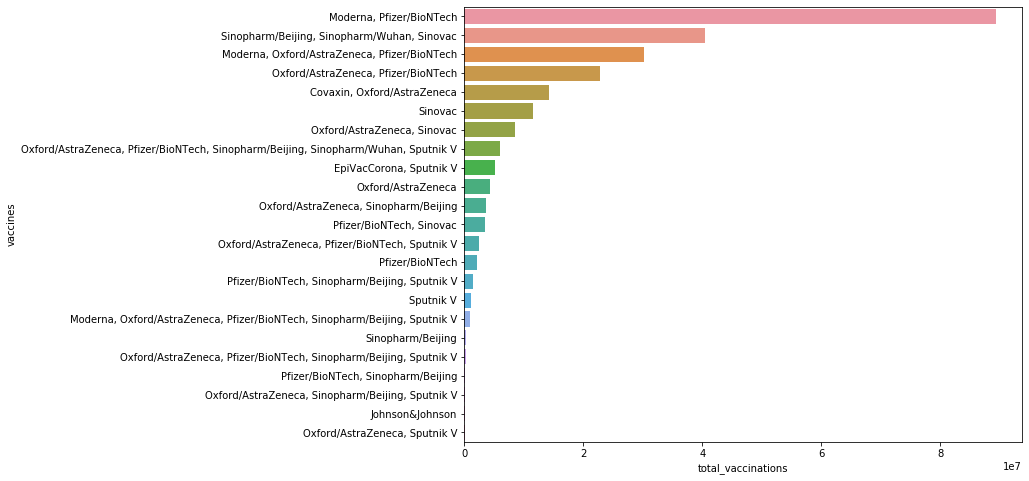

In [14]:
## get lastest data on total vaccination for different vaccines combo
vaccinationByVaccine = dataVaccine[['vaccines', 'country', 'total_vaccinations']].groupby(by = [
    'vaccines', 'country']).agg(max).reset_index().groupby(by = 'vaccines').agg(
    sum).reset_index().sort_values(by = 'total_vaccinations', ascending = False).reset_index(drop = True)
vaccines = [x for x in vaccinationByVaccine['vaccines']]
plt.figure(figsize = (10, 8))
sb.barplot(x = 'total_vaccinations', y = 'vaccines', data = vaccinationByVaccine, orient = 'h')

## <a id = '3.3'> 3.3. Daily vaccinations for top 10 vaccines combo </a>

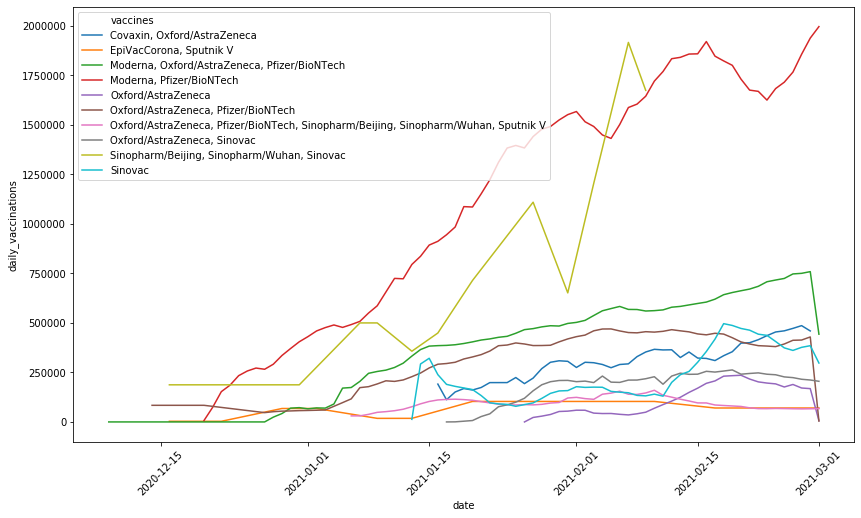

In [15]:
vaccineTop10 = dataVaccine[['vaccines', 'daily_vaccinations', 'date']][
    dataVaccine['vaccines'].isin(vaccines[:10])].dropna().groupby(
    by = ['vaccines', 'date']).agg(sum).reset_index()

## plot daily vaccinations for top 10 vaccines
plt.figure(figsize = (14, 8))
ax = sb.lineplot(x = 'date', y = 'daily_vaccinations', data = vaccineTop10, hue = 'vaccines')
for xticker in ax.get_xticklabels():
        xticker.set_rotation(45)

### Thoughts:
* Daily vaccinations for combos 'Moderna, Pfizer/BioNTech', 'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac', 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech' and 'Covaxin, Oxford/AstraZeneca' are increasing steadly.
* Daily vaccinations for other vaccine combos seem to reach their full capacity for now.